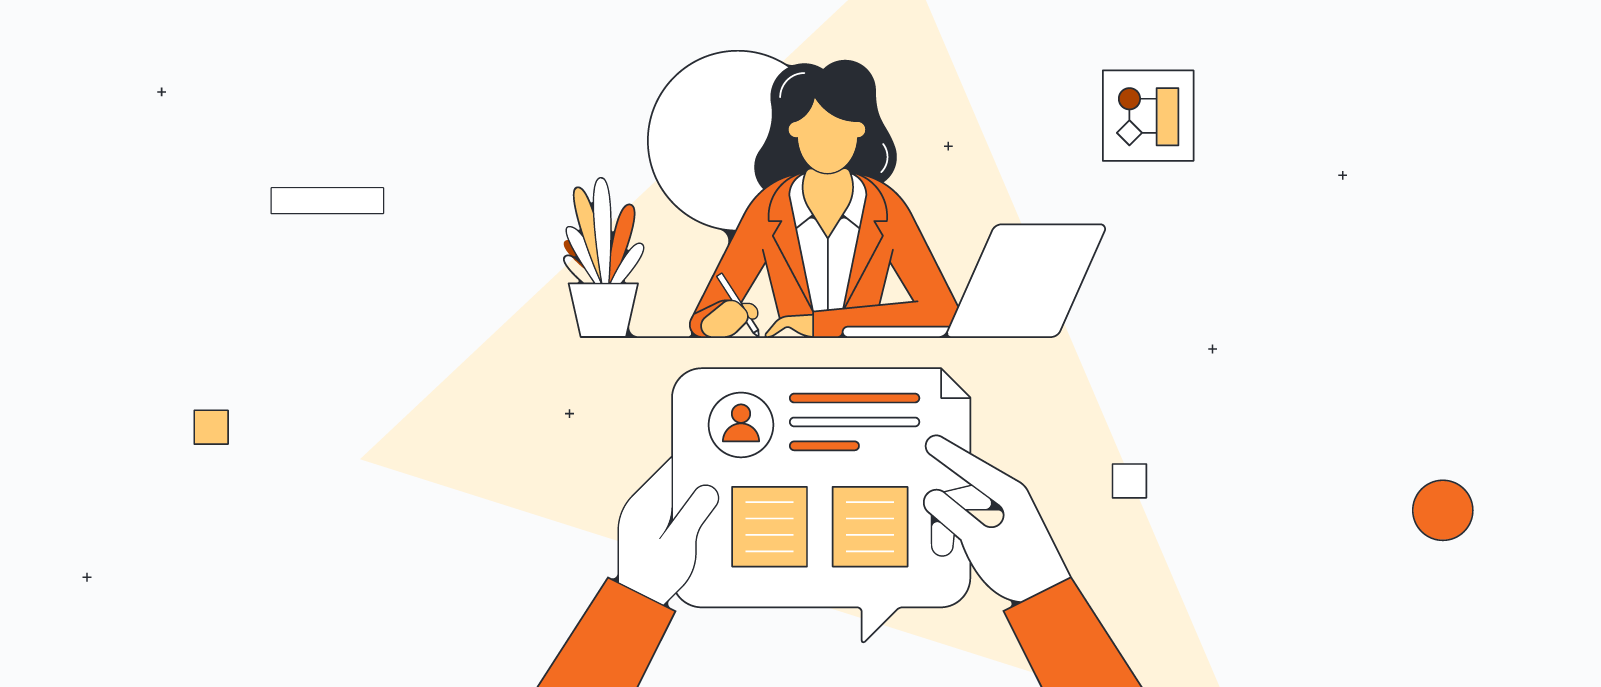

* **enrollee_id** : Unique ID for candidate
* **city**: City code
* **city_ development _index** : Development index of the city (scaled)
* **gender**: Gender of candidate
* **relevent_experience**: Relevant experience of candidate
* **enrolled_university**: Type of University course enrolled if any
* **education_level**: Education level of candidate
* **major_discipline** :Education major discipline of candidate
* **experience**: Candidate total experience in years
* **company_size**: No of employees in current employer's company
* **company_type** : Type of current employer
* **lastnewjob**: Difference in years between previous job and current job
* **training_hours**: training hours completed
* **target**: 0 – Not looking for job change, 1 – Looking for a job change

<br>

---
📖 **Table of Contents**
* [Importing Libraries](#section-one)
* [EDA (Exploratory Data Analysis)](#section-two)
  - [Initial Analysis](#section-two-one)
  - [Following Analysis](#section-two-two)
    - [Categorical Analysis](#section-two-two-one)
    - [Target Analysis](#section-two-two-two)
* [Data Preprocess](#section-three)
  - [Reduction](#section-three-one)
  - [Missing Values](#section-three-two)
  - [Outlier Detection & Handling](#section-three-three)
* [Visualization](#section-four)
  - [Univariate Analysis](#section-four-one)
    * [Categorical Analysis](#section-four-one-one)
    * [Numerical Analysis](#section-four-one-two)
    * [Target Analysis](#section-four-one-three)
  - [Bivariate Analysis](#section-four-two)
    * [Categorical vs Target](#section-four-two-one)
    * [Numerical vs Target](#section-four-two-two)
  - [Multivariate Analysis](#section-four-three)


<a name="section-one"></a>
# **Importing Libraries**

In [26]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [27]:
# Download data to the desired folder
!kaggle datasets download arashnic/hr-analytics-job-change-of-data-scientists

dataset = 'hr-analytics-job-change-of-data-scientists'
zip_file = f"{dataset}.zip"
destination_dir = f"/content/"

if not os.path.exists(zip_file):
    print(f"Error: {zip_file} not found.")
else:
    !unzip -uq $zip_file -d $destination_dir
    !rm $zip_file

Dataset URL: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
License(s): CC0-1.0
  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 76.3MB/s]


In [28]:
df_train_orginal = pd.read_csv("/content/aug_train.csv")
df_test_original = pd.read_csv("/content/aug_test.csv")


df_train = df_train_orginal.copy()
df_test = df_test_original.copy()

df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.00
1,29725,city_40,0.78,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.00
2,11561,city_21,0.62,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.00
3,33241,city_115,0.79,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.00
4,666,city_162,0.77,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.88,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.00
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.00
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.00
19156,5756,city_65,0.80,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.00


<a name="section-two"></a>
# **I. EDA**

- Initial Analysis
- Following Analysis
  * Categorical Analysis
  * Target Analysis

<a name="section-two-one"></a>
## **Initial Analysis**

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [30]:
print(f'Shape     : {df_train.shape}\n'
      f'Size      : {df_train.size}\n'
      f'Dimension : {df_train.ndim}')

Shape     : (19158, 14)
Size      : 268212
Dimension : 2


In [31]:
print(f'Total duplicated: {sum(df_train.duplicated())}')

Total duplicated: 0


In [32]:
df_train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [33]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.00,16875.36,9616.29,1.00,8554.25,16982.50,25169.75,33380.00
city_development_index,19158.00,0.83,0.12,0.45,0.74,0.90,0.92,0.95
training_hours,19158.00,65.37,60.06,1.00,23.00,47.00,88.00,336.00
target,19158.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00


In [34]:
df_train.corr(numeric_only=True).style.background_gradient(cmap='Blues', axis=0)

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


<a name="section-two-two"></a>
## **Following Analysis**

In [35]:
def grab_col_names(dataframe, cat_th=10, car_th=20, target_col=None, print_results=True):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "flaot"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car and col != target_col]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols and col != target_col]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')
        print(f'target_col:  {len([target_col])}')

    return cat_cols, num_cols, cat_but_car, target_col

cat_cols, num_cols, cat_but_car, target_col = grab_col_names(df_train, target_col='target')

Observations 19158
Variables:  14
cat_cols:  8
num_cols:  3
cat_but_car:  2
num_but_cat:  0
target_col:  1


<a name="section-two-two-one"></a>
### **Categorical Analysis**

In [36]:
def cat_summary(dataframe, cat_cols):
    if type(cat_cols) == list:
        for col in cat_cols:
            print(pd.DataFrame({"Count": dataframe[col].value_counts(),
                                "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}).to_markdown(numalign="center",
                                                                                                            stralign="center"))
            print("\n")
    else:
        print(pd.DataFrame({"Count": dataframe[cat_cols].value_counts(),
                            "Ratio": 100 * dataframe[cat_cols].value_counts() / len(dataframe)}).to_markdown(numalign="center",
                                                                                                             stralign="center"))

cat_summary(df_train, cat_cols)

|  gender  |  Count  |  Ratio   |
|:--------:|:-------:|:--------:|
|   Male   |  13221  | 69.0103  |
|  Female  |  1238   | 6.46205  |
|  Other   |   191   | 0.996973 |


|   relevent_experience   |  Count  |  Ratio  |
|:-----------------------:|:-------:|:-------:|
| Has relevent experience |  13792  | 71.9908 |
| No relevent experience  |  5366   | 28.0092 |


|  enrolled_university  |  Count  |  Ratio  |
|:---------------------:|:-------:|:-------:|
|     no_enrollment     |  13817  | 72.1213 |
|   Full time course    |  3757   | 19.6106 |
|   Part time course    |  1198   | 6.25326 |


|  education_level  |  Count  |  Ratio  |
|:-----------------:|:-------:|:-------:|
|     Graduate      |  11598  | 60.5387 |
|      Masters      |  4361   | 22.7633 |
|    High School    |  2017   | 10.5282 |
|        Phd        |   414   | 2.16098 |
|  Primary School   |   308   | 1.60768 |


|  major_discipline  |  Count  |  Ratio  |
|:------------------:|:-------:|:-------:|
|        STEM       

<a name="section-two-two-two"></a>
### **Target Analysis**

In [37]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}).to_markdown(numalign="center",
                                                                                                       stralign="center"), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df_train, 'target', col)

|  gender  |  TARGET_MEAN  |
|:--------:|:-------------:|
|  Female  |   0.263328    |
|   Male   |   0.227819    |
|  Other   |    0.26178    |


|   relevent_experience   |  TARGET_MEAN  |
|:-----------------------:|:-------------:|
| Has relevent experience |    0.21469    |
| No relevent experience  |   0.338427    |


|  enrolled_university  |  TARGET_MEAN  |
|:---------------------:|:-------------:|
|   Full time course    |   0.380889    |
|   Part time course    |   0.252087    |
|     no_enrollment     |   0.211406    |


|  education_level  |  TARGET_MEAN  |
|:-----------------:|:-------------:|
|     Graduate      |    0.27979    |
|    High School    |    0.19534    |
|      Masters      |    0.2144     |
|        Phd        |   0.140097    |
|  Primary School   |   0.133117    |


|  major_discipline  |  TARGET_MEAN  |
|:------------------:|:-------------:|
|        Arts        |   0.209486    |
|  Business Degree   |   0.262997    |
|     Humanities     |   0.210762    |


In [38]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}).to_markdown(numalign="center",
                                                                             stralign="center"), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df_train, 'target', col)

|  target  |  enrollee_id  |
|:--------:|:-------------:|
|    0     |    16601.2    |
|    1     |    17700.8    |


|  target  |  city_development_index  |
|:--------:|:------------------------:|
|    0     |         0.853139         |
|    1     |         0.755719         |


|  target  |  training_hours  |
|:--------:|:----------------:|
|    0     |     66.1138      |
|    1     |     63.1185      |




<a name="#section-three"></a>
# **II. Preprocess**

* Reduction
* Missing Values
* Outlier Detection & Handling


<a name="section-three-one"></a>
## **Reduction**

In [ ]:
df_train.drop(['enrollee_id'], axis=1, inplace=True)
df_test.drop(['enrollee_id'], axis=1, inplace=True)

num_cols.remove('enrollee_id')

<a name="section-three-two"></a>
## **Missing Values**

In [ ]:
def check_missing_value(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
check_missing_value(df_train)

                     n_miss  ratio
company_type           6140  32.05
company_size           5938  30.99
gender                 4508  23.53
major_discipline       2813  14.68
education_level         460   2.40
last_new_job            423   2.21
enrolled_university     386   2.01
experience               65   0.34


<a name="section-three-three"></a>
## **Outlier Detection & Handling**

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return  low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df_train, col))

city_development_index False
training_hours True


<a name="section-four"></a>
# **III. Visualization**

* Univariate Analysis
  - Categorical Analysis
  - Numerical Analysis
  - Target Analysis
* Bivariate Analysis
  - Categorical vs Target
  - Numerical vs Target
* Multivariate Analysis
  - Correlation Matrix
  - Pairplot

<a name="section-four-one"></a>
## **Univariate Analysis**


<a name="section-four-one-one"></a>
### **Categorical Analysis**

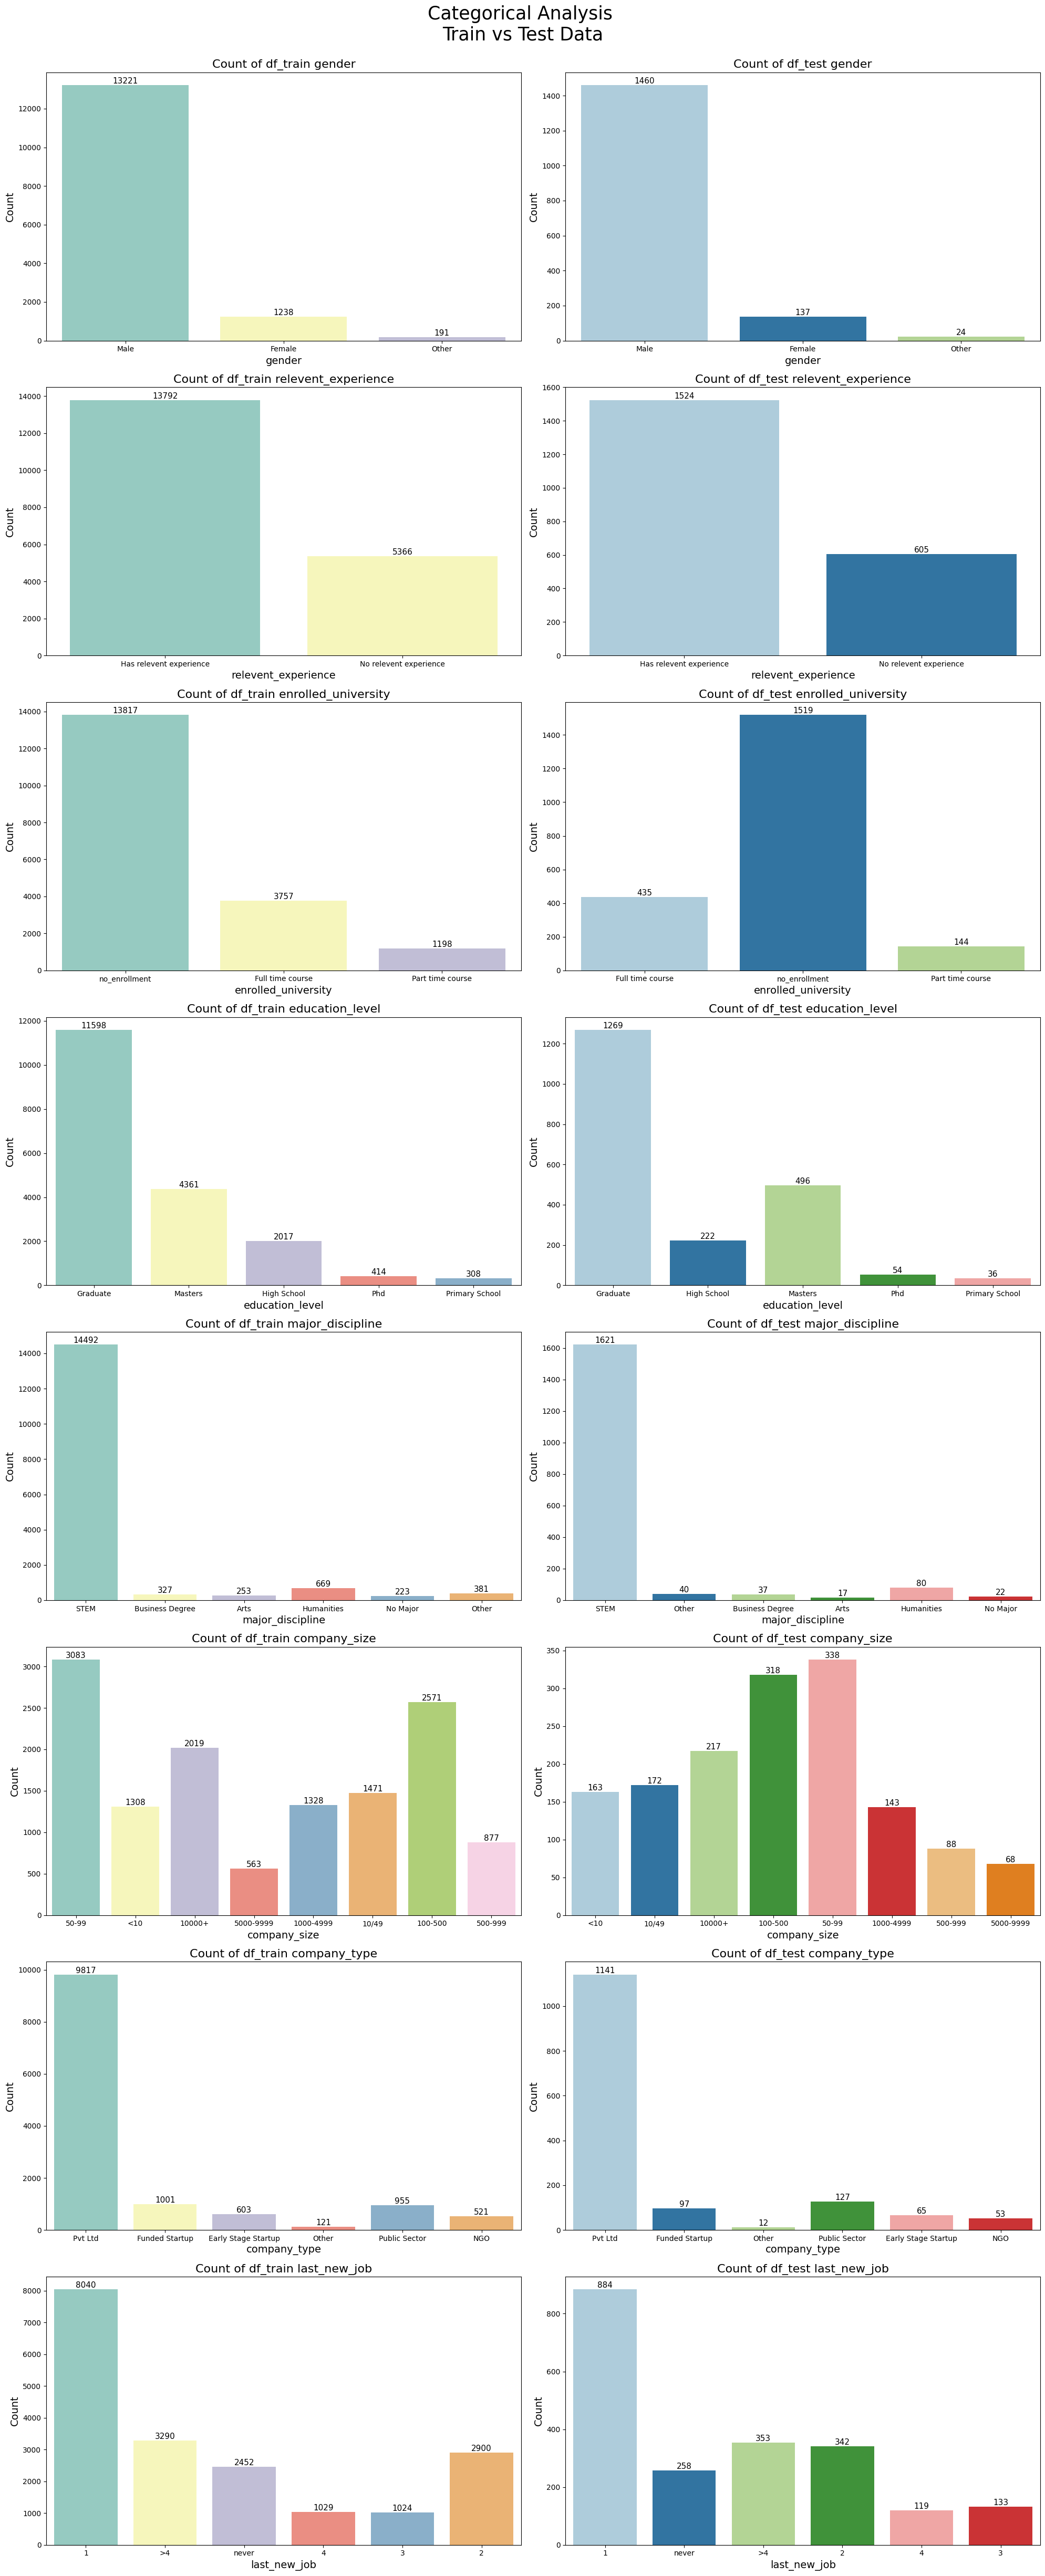

In [ ]:
def plot_bar_test_train(df_train, df_test, features, n_cols):
    n_rows = (len(features) - 1) // n_cols + 1
    fig, axs = plt.subplots(len(features), n_cols, figsize = (20, 50))

    for n, feature in enumerate(features):
        ax0 = sns.countplot(x=df_train[feature],
                            hue=df_train[feature],
                            legend=False,
                            ax=axs[n, 0],
                            palette='Set3')
        ax1 = sns.countplot(x=df_test[feature],
                            hue=df_test[feature],
                            legend=False,
                            ax=axs[n, 1],
                            palette='Paired')

        for ax in [ax0, ax1]:
            for container in ax.containers:
                 ax.bar_label(container, fontsize=11)

            ax.set_xlabel(f'{feature}', fontsize=14)
            ax.set_ylabel('Count', fontsize=14)
            if ax == ax0:
                ax.set_title(f"Count of df_train {feature}", fontsize=16)
            else:
                 ax.set_title(f"Count of df_test {feature}", fontsize=16)

    fig.suptitle("Categorical Analysis \nTrain vs Test Data", fontsize = 25)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_bar_test_train(df_train, df_test, cat_cols, 2)

<a name="section-four-one-two"></a>
### **Numerical Analysis**

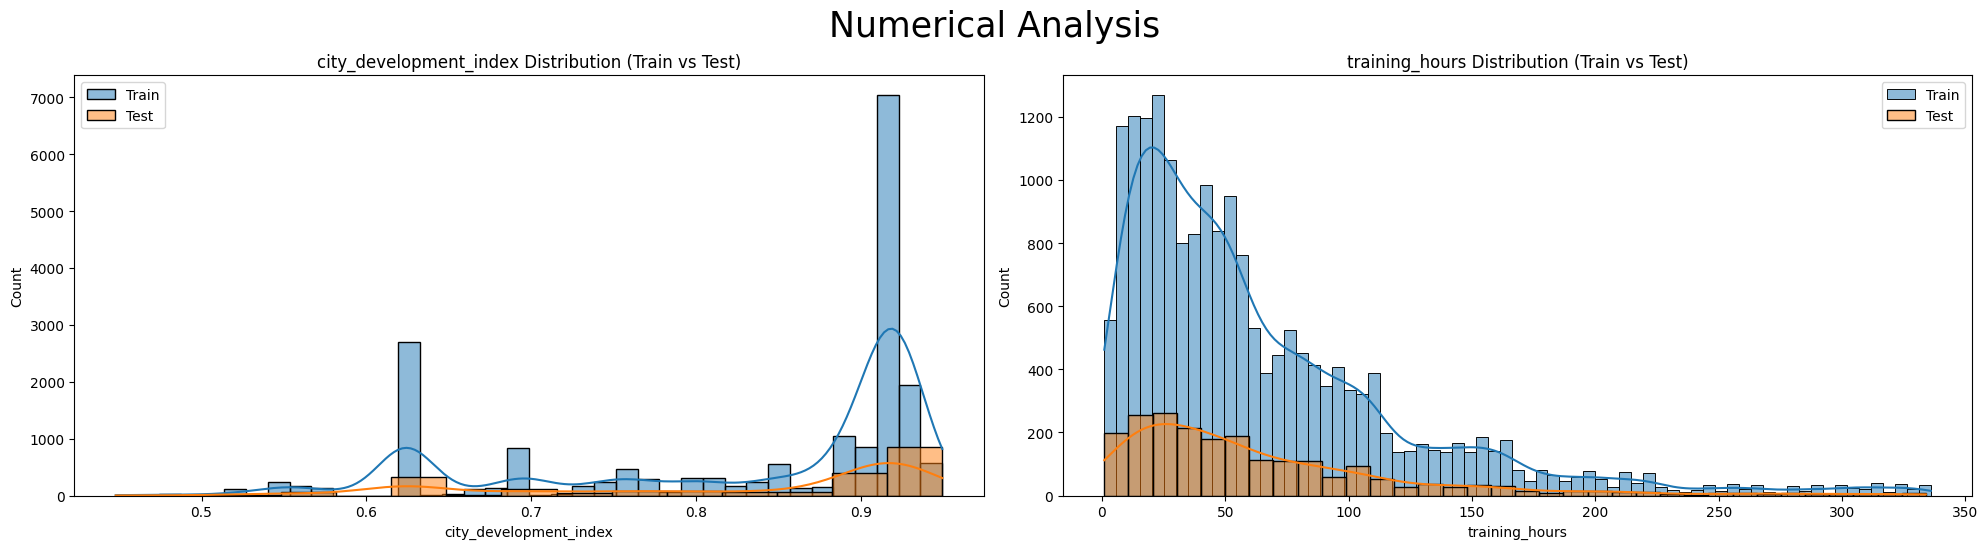

In [ ]:
def plot_histograms(df_train, df_test, features, target_col, n_cols=3):
    n_rows = (len(features) - 1) // n_cols + 1

    fig, axs = plt.subplots(len(features), n_cols, figsize = (20, 10))
    axs = axs.flatten()

    for i, var_name in enumerate(features):
            ax = axs[i]
            sns.histplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.histplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    for n in range(n_rows*n_cols*2):
        if not axs.flat[n].lines:
            axs.flat[n].set_visible(False)

    fig.suptitle("Numerical Analysis", fontsize = 25)
    plt.tight_layout()
    plt.show()

plot_histograms(df_train, df_test, num_cols, target_col, 2)

<a name="section-four-one-three"></a>
### **Target Analysis**

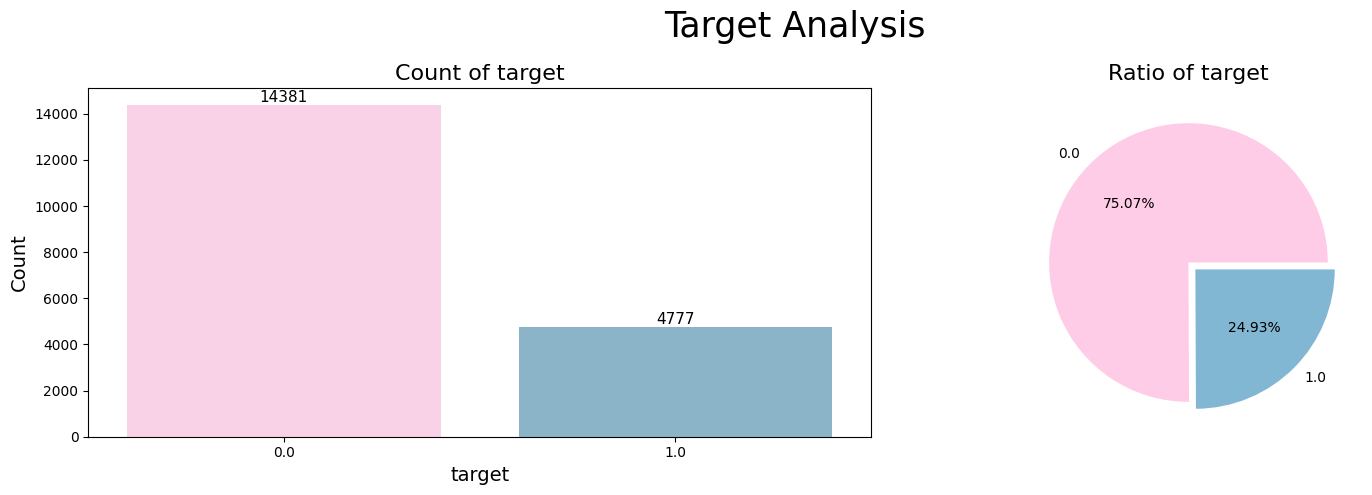

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (16, 5))

# Countplot
ax = sns.countplot(data=df_train,
                   x=df_train[target_col],
                   hue=df_train[target_col],
                   legend=False,
                   ax=axs[0],
                   palette=["#ffcce7", "#81b7d2"]);

for container in ax.containers:
      ax.bar_label(container, fontsize=11)

ax.set_xlabel(f'{target_col}', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title(f"Count of {target_col}", fontsize=16)

# Pie plot
ax2 = df_train[target_col].value_counts().plot.pie(explode=[0,0.07],
                                                   ylabel='',
                                                   ax = axs[1],
                                                   colors=["#ffcce7", "#81b7d2"],
                                                   autopct='%.2f%%');
axs[1].set_title(f"Ratio of {target_col}", fontsize=16);
fig.suptitle("Target Analysis", fontsize = 25)
plt.tight_layout()
plt.show()

<a name="section-four-two"></a>
## **Bivariate Analysis**

<a name="section-four-two-one"></a>
### **Categorical vs Target**

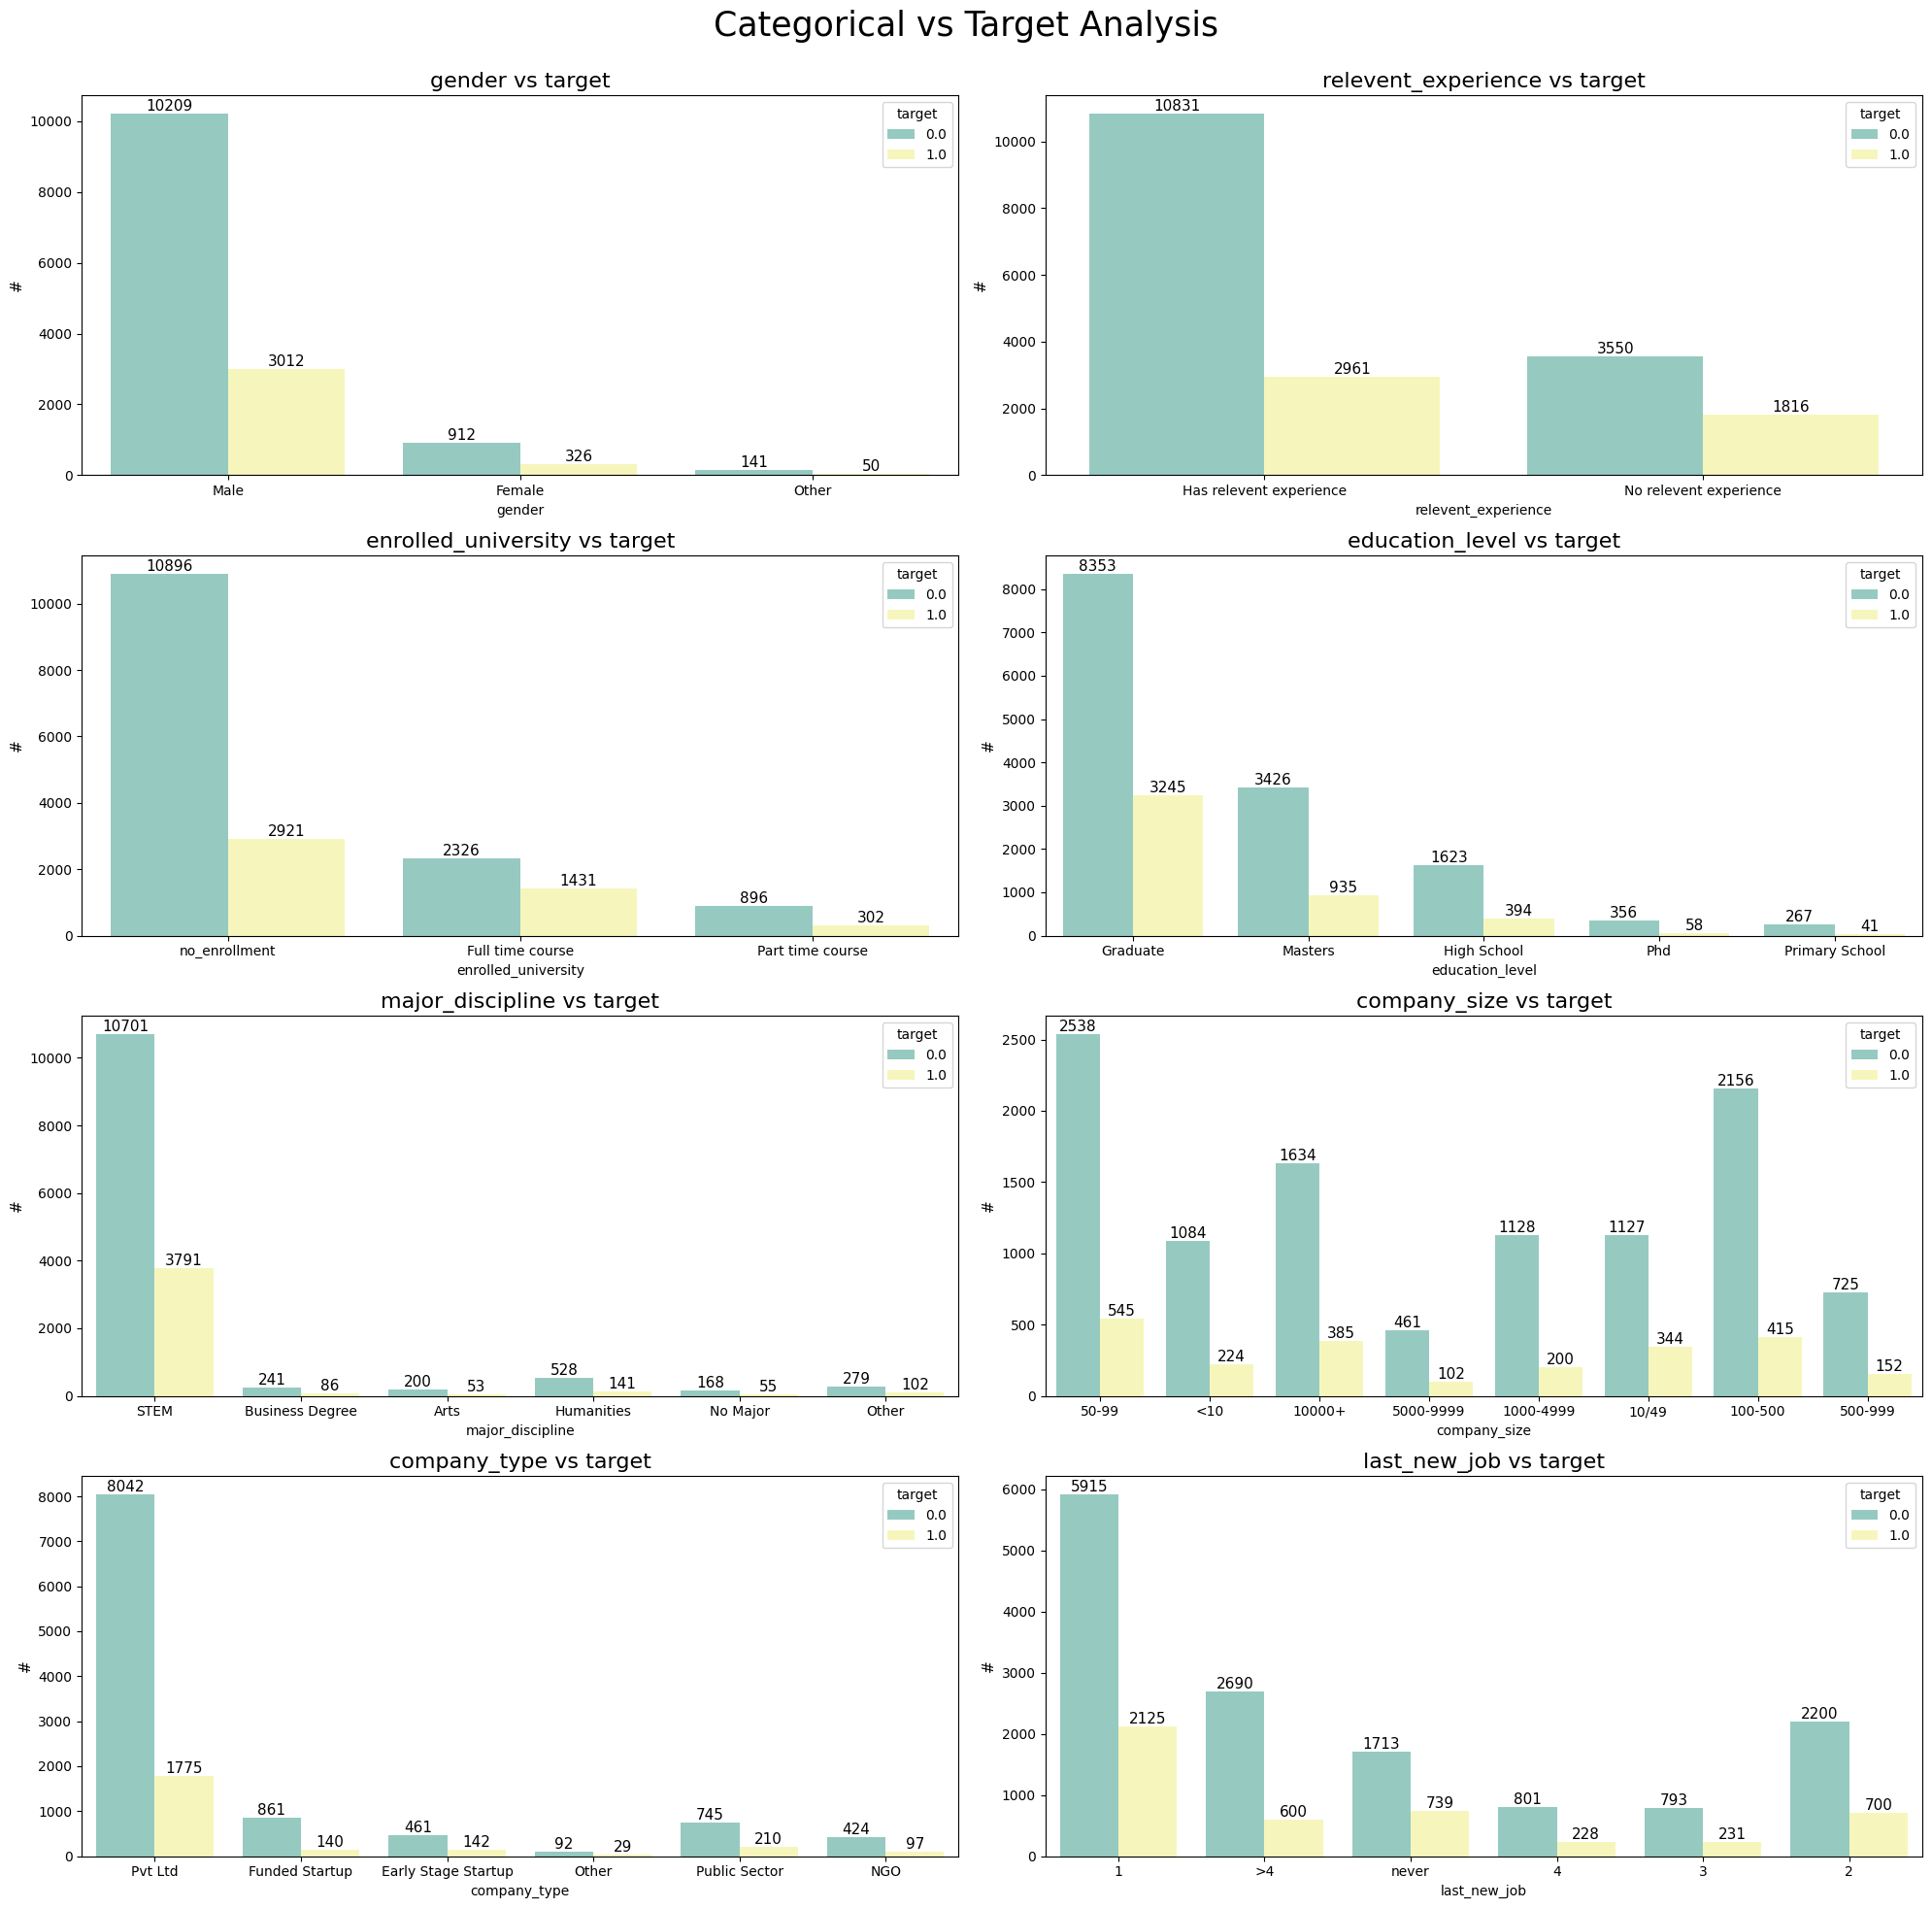

In [ ]:
def plot_bar(dataframe, features, target_col, n_cols):
    n_rows = (len(features) - 1) // n_cols + 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (20, 20))
    axs = axs.flatten()

    for n, feature in enumerate(features):
        ax = sns.countplot(x=dataframe[feature],
                           hue=dataframe[target_col],
                           ax=axs[n],
                           palette="Set3")

        axs[n].set_title(f"{feature} vs {target_col}", fontsize=16)
        ax.set_ylabel(f'#', fontsize=11)

        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', fontsize=11, label_type='edge')

    fig.suptitle("Categorical vs Target Analysis", fontsize = 25)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_bar(df_train, cat_cols, target_col, 2)

<a name="section-four-two-two"></a>
### **Numerical vs Target**

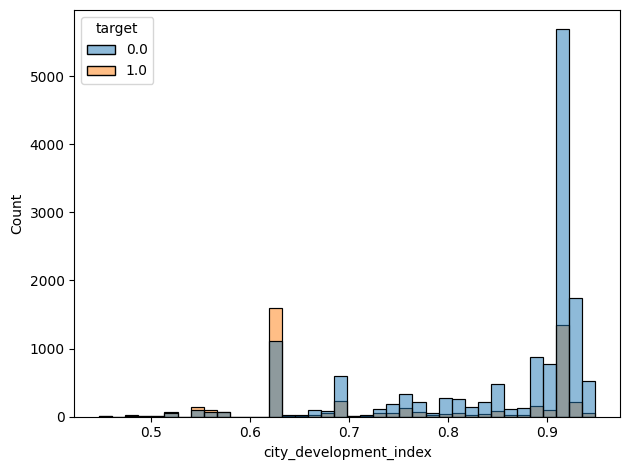

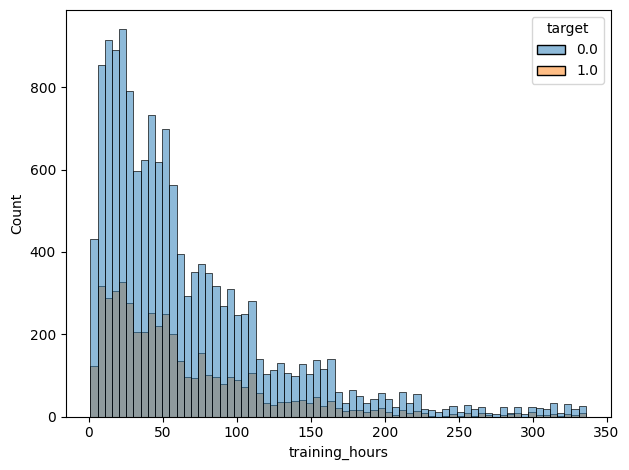

In [ ]:
for col in num_cols:
    sns.histplot(x=df_train[col],
                 hue=df_train[target_col])
    plt.tight_layout(h_pad=3)
    plt.show()

<a name="section-four-three"></a>

## **Multivariate Analysis**

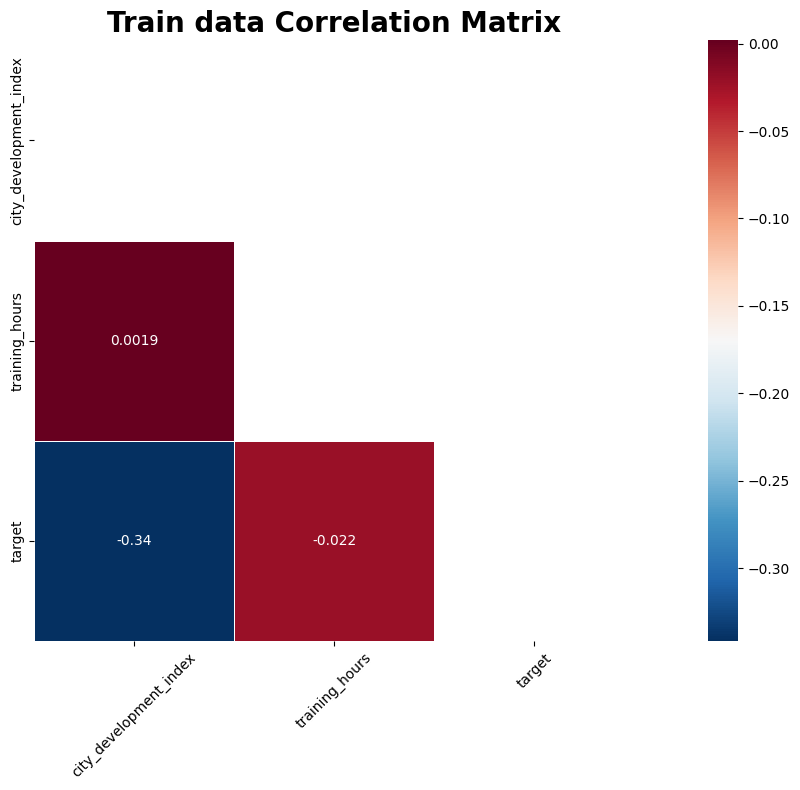

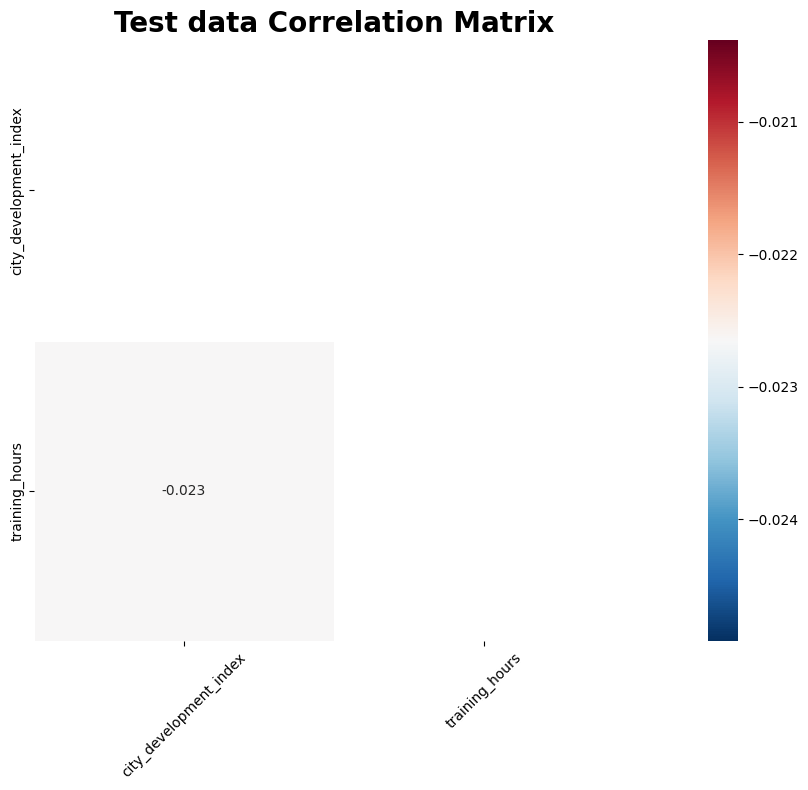

In [ ]:
def plot_heatmap(dataframe, title_key):
  plt.figure(figsize=(15,8))

  corr_mx = dataframe.corr(numeric_only=True)
  mask = np.triu(corr_mx)
  sns.heatmap(corr_mx,
              linewidths=0.5,
              square=True,
              cmap="RdBu_r",
              mask=mask,
              annot=True)
  plt.title(f"{title_key} Correlation Matrix", fontweight='bold', size=20)
  plt.xticks(rotation=45)
  plt.tight_layout()

plot_heatmap(df_train[num_cols + [target_col]], title_key='Train data')
plot_heatmap(df_test[num_cols], title_key='Test data')

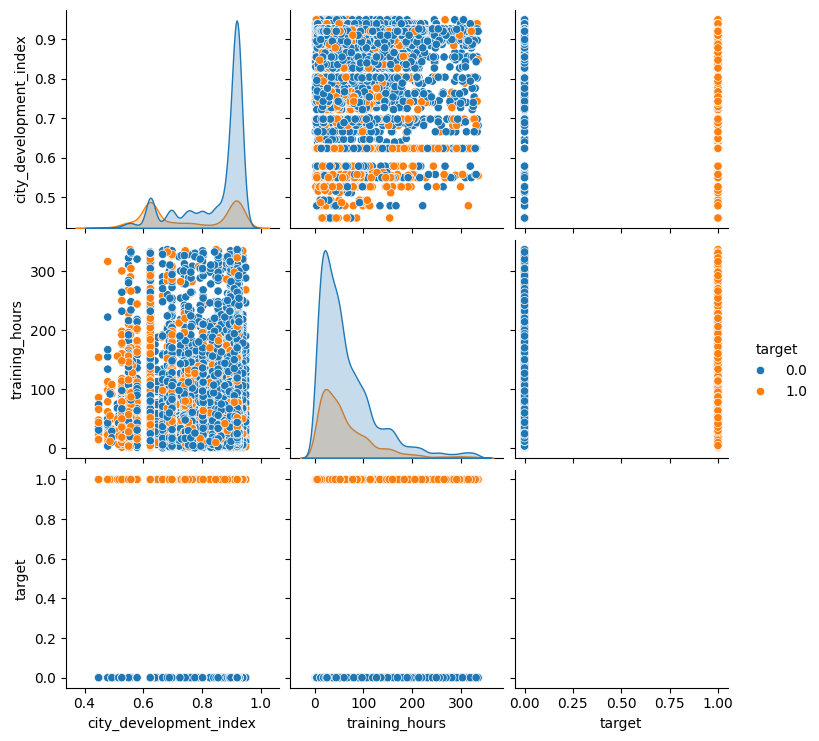

In [ ]:
sns.pairplot(data=df_train, vars=num_cols + [target_col], hue=target_col);